In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [2]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['sepal length (cm)'],df["sepal width (cm)"])
plt.scatter(df['petal length (cm)'],df["petal width (cm)"])

In [5]:
df=df.drop(["sepal length (cm)","sepal width (cm)"],axis=1)

In [6]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


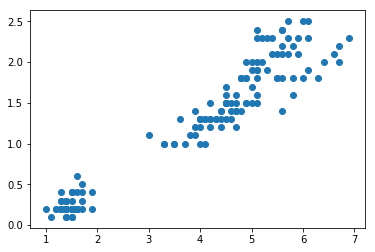

In [7]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [8]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
yp=km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
df["cluster"]=yp

In [11]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [12]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


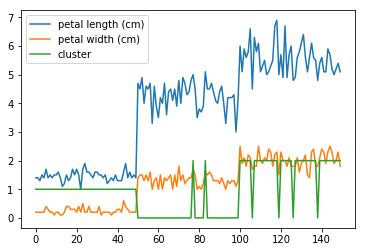

In [13]:
df.plot()

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

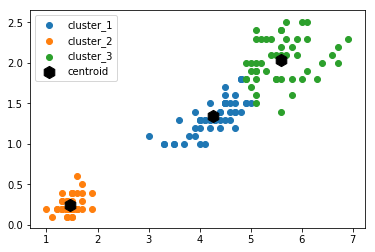

In [15]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],label="cluster_1")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],label="cluster_2")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],label="cluster_3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=150,color='black',marker='h',label="centroid")
plt.legend()

In [16]:
## elbow method
k_rng=range(1,10)
sse=[]  # sum of squered error
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

In [17]:
sse

[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.48300089968511,
 13.916908757908757,
 11.087223662604789,
 9.19386673204751,
 7.621496965452848,
 6.541584461432288]

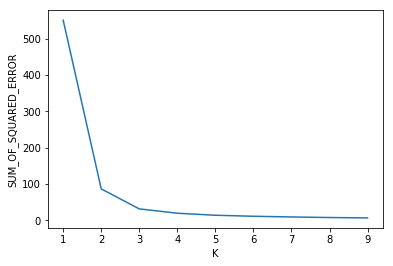

In [18]:
plt.xlabel("K")
plt.ylabel("SUM_OF_SQUARED_ERROR")
plt.plot(k_rng,sse)

In [193]:
import pandas as pd
df=pd.read_csv('clustering.csv')

In [194]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [195]:
df=df.drop('Loan_ID',axis=1)
df1=df.drop('Dependents',axis=1)

In [196]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [197]:
mead=df1.Loan_Amount_Term.median()
mead1=df1.Credit_History.median()

In [198]:
mead1

1.0

In [199]:
fill=df1.Loan_Amount_Term.fillna(mead)
fill1=df1.Credit_History.fillna(mead1)

In [200]:
df1.Loan_Amount_Term=fill
df1.Credit_History=fill1

In [201]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [202]:
df1.Gender=df.Gender.fillna('Male')
df1.Self_Employed=df.Self_Employed.fillna('No')

In [203]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label2=LabelEncoder()
label3=LabelEncoder()
label4=LabelEncoder()
label5=LabelEncoder()
label6=LabelEncoder()
label1.fit_transform(df1.Gender)
label2.fit_transform(df1.Married)
label3.fit_transform(df1.Education)
label4.fit_transform(df1.Self_Employed)
label5.fit_transform(df1.Property_Area)
label6.fit_transform(df1.Loan_Status)
df1.Gender=label1.fit_transform(df1.Gender)
df1.Married=label2.fit_transform(df1.Married)
df1.Education=label3.fit_transform(df1.Education)
df1.Self_Employed=label4.fit_transform(df1.Self_Employed)
df1.Property_Area=label5.fit_transform(df1.Property_Area)
df1.Loan_Status=label6.fit_transform(df1.Loan_Status)

In [204]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [205]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[["ApplicantIncome","CoapplicantIncome"]])
    sse.append(km.inertia_)

In [206]:
sse

[2848214273.78998,
 1522322800.1672785,
 895798273.3931776,
 626188746.4183998,
 512716528.7289083,
 417471273.4675997,
 337537744.9882949,
 269953317.88581425,
 229180367.999283]

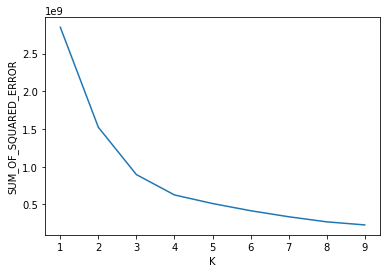

In [207]:
plt.xlabel("K")
plt.ylabel("SUM_OF_SQUARED_ERROR")
plt.plot(k_rng,sse)

In [213]:
final=df1.drop(["Gender","Married",'Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status'],axis =1)

In [215]:
final.head()

,ApplicantIncome,CoapplicantIncome
0,4583,1508.0
1,3000,0.0
2,2583,2358.0
3,6000,0.0
4,2333,1516.0


In [228]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [229]:
yp=km.fit_predict(df1)
yp

array([0, 0, 2, 3, 2, 0, 2, 2, 2, 3, 0, 0, 3, 2, 3, 2, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 3, 3, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 3, 0, 3, 2, 3, 2, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2,
       0, 2, 2, 2, 3, 3, 0, 0, 2, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0,
       2, 2, 3, 2, 0, 2, 2, 3, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 0, 2, 3, 3, 3, 2, 3, 3, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0, 0, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2,
       0, 3, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       3, 0, 0, 0, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 0,
       0, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 3, 0, 2, 3, 2, 0, 3, 0, 0, 3, 3, 2, 0, 2, 3, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 3, 0, 0, 0, 3, 3, 0, 3, 2, 2, 2,

In [230]:
final['cluster']=yp

In [231]:
final.head()

,ApplicantIncome,CoapplicantIncome,cluster
0,4583,1508.0,0
1,3000,0.0,0
2,2583,2358.0,2
3,6000,0.0,3
4,2333,1516.0,2


In [232]:
final1 = final[final.cluster ==0]
final2 = final[final.cluster ==1]
final3 = final[final.cluster ==2]

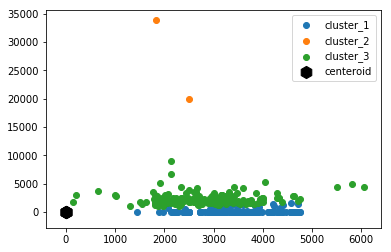

In [233]:
import matplotlib.pyplot as plt
plt.scatter(final1["ApplicantIncome"],final1["CoapplicantIncome"],label = "cluster_1")
plt.scatter(final2["ApplicantIncome"],final2["CoapplicantIncome"],label = "cluster_2")
plt.scatter(final3["ApplicantIncome"],final3["CoapplicantIncome"],label = "cluster_3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 150,color = "black",marker = "h",label = "centeroid")
plt.legend()

In [234]:
km.cluster_centers_

array([[6.60000000e-01, 4.60000000e-01, 2.60000000e-01, 9.33333333e-02,
        3.51930667e+03, 1.36380800e+02, 9.28800000e+01, 3.41360000e+02,
        8.73333333e-01, 1.08666667e+00, 6.40000000e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.16800000e+03, 2.69185000e+04, 9.65000000e+01, 3.60000000e+02,
        1.00000000e+00, 1.50000000e+00, 5.00000000e-01],
       [8.49710983e-01, 7.45664740e-01, 2.89017341e-01, 4.62427746e-02,
        2.82710405e+03, 2.31315491e+03, 1.11173410e+02, 3.42034682e+02,
        8.43930636e-01, 1.05780347e+00, 7.74566474e-01],
       [8.57142857e-01, 5.35714286e-01, 2.50000000e-01, 2.32142857e-01,
        6.11785714e+03, 2.17357143e+02, 1.18607143e+02, 3.39000000e+02,
        8.03571429e-01, 9.28571429e-01, 7.14285714e-01]])